In [1]:
import pandas as pd

df = pd.read_csv(r"D:\reviews_badminton\data.csv")
df.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1


In [3]:
df.shape

(8518, 8)

In [4]:
df.columns

Index(['Reviewer Name', 'Review Title', 'Place of Review', 'Up Votes',
       'Down Votes', 'Month', 'Review text', 'Ratings'],
      dtype='object')

In [5]:
df.isnull().sum()


Reviewer Name       10
Review Title        10
Place of Review     50
Up Votes            10
Down Votes          10
Month              465
Review text          8
Ratings              0
dtype: int64

In [15]:
df = df.dropna(subset=["Review text"])

In [17]:
df["Reviewer Name"] = df["Reviewer Name"].fillna("Unknown")
df["Review Title"] = df["Review Title"].fillna("Unknown")
df["Place of Review"] = df["Place of Review"].fillna("Unknown")

In [18]:
df["Up Votes"] = df["Up Votes"].fillna(0)
df["Down Votes"] = df["Down Votes"].fillna(0)

In [19]:
df["Month"] = df["Month"].fillna("Unknown")


In [20]:
df.isnull().sum()


Reviewer Name      0
Review Title       0
Place of Review    0
Up Votes           0
Down Votes         0
Month              0
Review text        0
Ratings            0
sentiment          0
cleaned_review     0
dtype: int64

In [21]:
def create_sentiment(rating):
    if rating >= 4:
        return "positive"
    else:
        return "negative"

df["sentiment"] = df["Ratings"].apply(create_sentiment)


In [22]:
df["sentiment"].value_counts()


sentiment
positive    6823
negative    1687
Name: count, dtype: int64

In [23]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download("stopwords")
nltk.download("wordnet")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\srira\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\srira\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [24]:
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"[^a-zA-Z]", " ", text)
    words = text.split()
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]
    return " ".join(words)


In [25]:
df["cleaned_review"] = df["Review text"].apply(clean_text)


In [26]:
df[["Review text", "cleaned_review"]].head()


,Review text,cleaned_review
0,"Nice product, good quality, but price is now r...",nice product good quality price rising bad sig...
1,They didn't supplied Yonex Mavis 350. Outside ...,supplied yonex mavis outside cover yonex ad in...
2,Worst product. Damaged shuttlecocks packed in ...,worst product damaged shuttlecock packed new b...
3,"Quite O. K. , but nowadays the quality of the...",quite k nowadays quality cork like year back u...
4,Over pricedJust â?¹620 ..from retailer.I didn'...,pricedjust retailer understand wat advantage b...


In [27]:
df.to_csv("cleaned_badminton_reviews.csv", index=False)

In [28]:
from sklearn.model_selection import train_test_split

X = df["cleaned_review"]
y = df["sentiment"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)

lr_predictions = lr_model.predict(X_test_tfidf)

lr_f1 = f1_score(y_test, lr_predictions, pos_label="positive")
print("Logistic Regression F1 Score:", lr_f1)


Logistic Regression F1 Score: 0.9240331491712708


In [31]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

nb_predictions = nb_model.predict(X_test_tfidf)

nb_f1 = f1_score(y_test, nb_predictions, pos_label="positive")
print("Naive Bayes F1 Score:", nb_f1)


Naive Bayes F1 Score: 0.9192886456908345


In [32]:
import pickle

with open("final_sentiment_model.pkl", "wb") as f:
    pickle.dump((lr_model, tfidf), f)

In [33]:
negative_df = df[df["sentiment"] == "negative"]
negative_df.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings,sentiment,cleaned_review
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1,negative,supplied yonex mavis outside cover yonex ad in...
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1,negative,worst product damaged shuttlecock packed new b...
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,Unknown,"Quite O. K. , but nowadays the quality of the...",3,negative,quite k nowadays quality cork like year back u...
4,ASHIK P A,Over priced,Unknown,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1,negative,pricedjust retailer understand wat advantage b...
13,Hashim A,Did not meet expectations,"Certified Buyer, Panoor",22.0,5.0,Mar 2021,This is the second time i am getting an opened...,1,negative,second time getting opened bundle yonex mavis ...


In [34]:
from collections import Counter

all_words = " ".join(negative_df["cleaned_review"]).split()
word_freq = Counter(all_words)

word_freq.most_common(20)

[('read', 476),
 ('shuttle', 426),
 ('quality', 361),
 ('product', 325),
 ('good', 269),
 ('bad', 217),
 ('goodread', 186),
 ('one', 124),
 ('qualityread', 120),
 ('worst', 108),
 ('poor', 104),
 ('day', 98),
 ('productread', 91),
 ('box', 79),
 ('buy', 78),
 ('cork', 78),
 ('time', 76),
 ('mavis', 73),
 ('badread', 71),
 ('original', 63)]

(np.float64(-0.5), np.float64(799.5), np.float64(399.5), np.float64(-0.5))

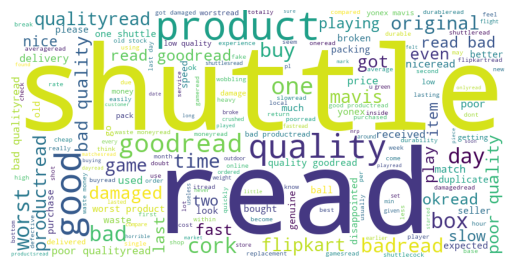

In [35]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(width=800, height=400, background_color="white")
wc.generate(" ".join(negative_df["cleaned_review"]))

plt.imshow(wc)
plt.axis("off")

In [36]:
import pickle

model, tfidf = pickle.load(open("final_sentiment_model.pkl", "rb"))

In [37]:
sample_review = "Shuttle quality is very poor and breaks easily"

cleaned = clean_text(sample_review)
vector = tfidf.transform([cleaned])

prediction = model.predict(vector)
prediction

array(['negative'], dtype=object)

In [38]:
sample_review = "Very good quality shuttle, lasts long and worth the price"

cleaned = clean_text(sample_review)
vector = tfidf.transform([cleaned])

model.predict(vector)

array(['positive'], dtype=object)